# 데이터 준비

## 라이브러리 /패키지 설치

In [4]:
# 필요 라이브러리 설치 완료.

#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install autokeras
#!pip install opencv-python
#!pip install seaborn
#!pip install tensorflow
#!pip install datetime
#!pip install matpltlib
#!pip install pydot
#!pip install graphviz

## 라이브러리/패키지 불러오기

In [6]:
# 케라스와 텐서플로우에 맞는 버전(2.15.0) 다운그레이드
# pip install --upgrade tensorflow==2.15.0

In [7]:
# 버전 확인
import tensorflow as tf
# import autokeras as ak

print(tf.__version__)
# print(ak.__version__)


2.15.0


In [8]:
# 데이터 처리를 위한 라이브러리
import os
import pandas as pd  # 데이터 프레임을 쉽게 다루기 위한 라이브러리
import numpy as np  # 수학 및 과학 연산을 위한 라이브러리

# 이미지 처리 및 시각화를 위한 라이브러리
import cv2  # 이미지 및 비디오 처리를 위한 라이브러리
import matplotlib.pyplot as plt  # 그래프를 그리기 위한 라이브러리
import datetime  # 날짜와 시간을 다루기 위한 라이브러리

# 머신러닝 및 딥러닝을 위한 라이브러리
from sklearn import tree  # 의사결정 트리 알고리즘을 위한 라이브러리
import autokeras as ak  # 자동 머신러닝 라이브러리

# 데이터 시각화 및 기타 유틸리티 라이브러리
import seaborn as sns  # 고급 데이터 시각화를 위한 라이브러리
import glob  # 파일 패턴 매칭을 위한 라이브러리
from PIL import Image  # 이미지 처리를 위한 라이브러리
from sklearn.utils import shuffle  # 데이터를 무작위로 섞기 위한 라이브러리
from sklearn.metrics import mean_squared_error  # 회귀 모델 평가를 위한 평균 제곱 오차 함수
from math import sqrt  # 수학 계산을 위한 라이브러리
from tensorflow.keras.utils import plot_model  # Keras 모델 시각화를 위한 함수

# 모델 평가를 위한 라이브러리
from sklearn.model_selection import train_test_split  # 데이터셋 분할을 위한 함수
import tensorflow as tf  # 딥러닝을 위한 텐서플로우 라이브러리
from sklearn.metrics import confusion_matrix  # 혼동 행렬을 계산하기 위한 함수
from sklearn.metrics import accuracy_score  # 정확도를 계산하기 위한 함수
from sklearn.metrics import precision_score  # 정밀도를 계산하기 위한 함수
from sklearn.metrics import recall_score  # 재현율을 계산하기 위한 함수
from sklearn.metrics import f1_score  # F1 점수를 계산하기 위한 함수
from sklearn.metrics import roc_curve  # ROC 곡선을 그리기 위한 함수
from sklearn.metrics import classification_report  # 분류 리포트를 생성하기 위한 함수

코드 설명

- 데이터 처리: pandas와 numpy는 데이터 프레임과 배열을 처리하는 데 사용됩니다.
- 이미지 처리: cv2와 PIL은 이미지 처리에 사용됩니다.
- 데이터 시각화: matplotlib와 seaborn은 그래프와 차트를 그리는 데 사용됩니다.
- 날짜와 시간 처리: datetime은 날짜와 시간을 다루는 데 사용됩니다.
- 머신러닝 및 딥러닝: sklearn과 tensorflow, autokeras는 모델을 구축하고 평가하는 데 사용됩니다.
- 모델 시각화: plot_model은 Keras 모델을 시각화합니다.
- 모델 평가: 다양한 sklearn.metrics 함수는 모델의 성능을 평가하는 데 사용됩니다.

## 데이터 불러오기

In [11]:
import os
import pandas as pd
import numpy as np
import glob
from sklearn.utils import shuffle

class AutoImageClassification:
    def __init__(self, path):
        """
        초기화 메서드
        주어진 경로에서 학습 및 테스트 데이터프레임을 생성합니다.
        :param path: 이미지 데이터셋이 저장된 기본 경로
        """
        self.train_df = self._create_df(path, '\학습')  # 학습 데이터프레임 생성
        self.test_df = self._create_df(path, '\테스트')  # 테스트 데이터프레임 생성

    @staticmethod
    def _create_df(path, path2):
        """
        데이터프레임 생성 메서드
        주어진 경로에서 정상 및 불량 이미지를 불러와 데이터프레임으로 만듭니다.
        :param path: 기본 경로
        :param path2: 학습 또는 테스트 데이터 경로
        :return: 이미지 경로와 레이블이 포함된 데이터프레임
        """
        files1 = glob.glob(path + path2 + "\정상\*.png")  # 정상 이미지 경로 리스트
        files2 = glob.glob(path + path2 + "\불량\*.png")  # 불량 이미지 경로 리스트
        print('정상:', len(files1))  # 정상 이미지 개수 출력
        print('불량:', len(files2))  # 불량 이미지 개수 출력
        
        df_n = pd.DataFrame()  # 불량 이미지 데이터프레임 초기화
        df_p = pd.DataFrame()  # 정상 이미지 데이터프레임 초기화
        
        df_n['name'] = [x for x in files2]  # 불량 이미지 경로 추가
        df_n['outcome'] = 0.  # 불량 이미지 레이블 추가
        
        df_p['name'] = [x for x in files1]  # 정상 이미지 경로 추가
        df_p['outcome'] = 1.  # 정상 이미지 레이블 추가
        
        df = pd.concat([df_n, df_p], axis=0, ignore_index=True)  # 두 데이터프레임 병합
        df = shuffle(df)  # 데이터프레임 셔플
        return df

    def create_x_and_y(self):
        """
        학습 데이터와 레이블 생성 메서드
        :return: 전처리된 이미지 배열(X)와 레이블(y)
        """
        X = np.array([img_preprocess(p) for p in self.train_df.name.values])  # 이미지 전처리 및 배열 생성
        y = self.train_df.outcome.values  # 레이블 배열 생성
        return X, y

In [12]:
# 현재 작업 디렉토리에 있는 'resized' 폴더 경로 설정
dir_path = os.path.join(os.getcwd(), 'resized')
aic = AutoImageClassification(path=dir_path)  # AutoImageClassification 클래스 인스턴스 생성

정상: 1102
불량: 59
정상: 276
불량: 15


코드 설명

1. 라이브러리 불러오기: 필요한 라이브러리를 불러옵니다. 여기에는 데이터 프레임 처리, 배열 처리, 파일 패턴 매칭 및 셔플 기능을 위한 라이브러리가 포함됩니다.
2. 이미지 전처리 함수: img_preprocess 함수는 이미지 경로를 입력으로 받아 전처리된 이미지를 반환하는 가정된 함수입니다. 실제 구현이 필요합니다.
3. AutoImageClassification 클래스:
   
    - __init__: 클래스 초기화 메서드로, 주어진 경로에서 학습 및 테스트 데이터프레임을 생성합니다.
    - _create_df: 주어진 경로에서 정상 및 불량 이미지 파일을 불러와 데이터프레임을 생성합니다.
    - create_x_and_y: 전처리된 이미지 배열(X)과 레이블(y)을 생성합니다.

## 이미지 데이터 불러오기 및 이미지 데이터 전처리

In [15]:
def img_preprocess(img):
    """
    이미지 전처리 함수
    주어진 이미지 경로를 입력받아 RGB 변환, 크기 조정, 정규화를 수행합니다.
    :param img: 이미지 파일 경로
    :return: 전처리된 이미지 배열
    """
    img = Image.open(img)  # 이미지를 열기
    img = img.convert('RGB')  # 이미지를 RGB 형식으로 변환
    img = img.resize((256, 256))  # 이미지를 256x256 크기로 조정
    img = np.asarray(img) / 255  # 이미지를 배열로 변환하고 0-1 범위로 정규화
    return img  # 전처리된 이미지 반환

함수 설명

- Image.open(img): 주어진 경로에서 이미지를 엽니다.
- img.convert('RGB'): 이미지를 RGB 형식으로 변환하여 색상 정보를 표준화합니다.
- img.resize((256, 256)): 이미지를 256x256 픽셀 크기로 조정하여 일관된 입력 크기를 보장합니다.
- np.asarray(img) / 255: 이미지를 NumPy 배열로 변환하고, 각 픽셀 값을 0-1 범위로 정규화합니다.

## 모델링

In [18]:
# 이미 모델링 된 모델 파일(best_model/image_classifier_model.h5)이 있으므로 주석 풀지 말 것.

# is_training = True  # 모델을 학습할지 여부를 결정하는 변수

# 
# if is_training:
#     X, y = aic.create_x_and_y()  # 전처리된 이미지 데이터와 레이블을 생성
#    
#     # 프로젝트 디렉토리를 간단한 경로로 변경하여 테스트
#     # * 중요! 디렉토리를 선택 할 때 한글로 된 디렉토리를 설정하였을 때 오류가 남.
#     project_dir = 'C:/Users/Allen/Desktop/Project/KAMP'  # 프로젝트 디렉토리 경로
#    
#     if not os.path.exists(project_dir):  # 경로가 존재하지 않으면
#         os.makedirs(project_dir)  # 디렉토리 생성
#     
#     project_name = 'image_classifier'  # 프로젝트 이름 설정
#      
#     # AutoKeras ImageClassifier 모델 설정
#     model = ak.ImageClassifier(
#         max_trials=50,  # 모델 탐색 시도 횟수
#         loss='binary_crossentropy',  # 손실 함수 설정
#         metrics='accuracy',  # 평가 지표 설정
#          directory=project_dir,  # 모델 저장 경로
#          project_name=project_name,  # 프로젝트 이름
#         overwrite=True  # 기존 모델 덮어쓰기 여부
#     )
#     # 모델 학습
#     model.fit(
#         x=X,  # 학습 데이터
#         y=y,  # 레이블
#         epochs=3,  # 학습 에포크 수
#         validation_split=0.2,  # 검증 데이터 비율
#         verbose=2  # 학습 과정 출력 설정
#     )
#     model = model.export_model()  # 최적의 모델을 추출
# 
#     # 모델 저장
#     model.save('C:/Users/Allen/Desktop/Project/KAMP/image_classifier/best_model/image_classifier_model.h5')
# else:
#     # 학습된 모델을 로드
#     model = tf.keras.models.load_model(
#         "C:/Users/Allen/Desktop/Project/KAMP/image_classifier/best_model",  # 저장된 모델 경로
#         custom_objects=ak.CUSTOM_OBJECTS  # AutoKeras 커스텀 객체
#     )

코드 설명

1. is_training 변수: 모델을 학습할지 여부를 결정하는 변수입니다.
2. 데이터 생성: aic.create_x_and_y()를 호출하여 전처리된 이미지 데이터와 레이블을 생성합니다.
3. 프로젝트 디렉토리 설정:
    - project_dir 변수에 경로를 지정하고, 경로가 존재하지 않으면 os.makedirs(project_dir)로 디렉토리를 생성합니다.
4. 모델 설정:
    - ak.ImageClassifier를 사용하여 AutoKeras 이미지 분류 모델을 설정합니다.
    - max_trials는 모델 탐색 시도 횟수, loss는 손실 함수, metrics는 평가 지표를 설정합니다.
    - directory와 project_name을 통해 모델이 저장될 경로와 프로젝트 이름을 지정합니다.
    - overwrite=True로 설정하여 기존 모델이 있으면 덮어씁니다.
5. 모델 학습:
    - fit() 메서드를 사용하여 모델을 학습시킵니다.
    - x는 학습 데이터, y는 레이블, epochs는 학습 에포크 수, validation_split은 검증 데이터 비율, verbose는 학습 과정 출력 설정입니다.
6. 모델 저장:
    - model.export_model()을 사용하여 최적의 모델을 추출합니다.
7.  모델 로드:
    - 학습된 모델을 로드하려면 tf.keras.models.load_model()을 사용합니다.
    - custom_objects=ak.CUSTOM_OBJECTS를 설정하여 AutoKeras 커스텀 객체를 포함합니다.

### 쥬피터 노트북 재 실행시 해당 코드를 실행시켜 모델 로드

In [21]:
# 새롭게 쥬피터 로딩시 해당 코드 실행
# 학습된 모델을 로드
model = tf.keras.models.load_model(
        "C:/Users/Allen/Desktop/Project/KAMP/image_classifier/best_model",  # 저장된 모델 경로
        custom_objects=ak.CUSTOM_OBJECTS  # AutoKeras 커스텀 객체
    )

## 모델 시각화

In [23]:
# 모델의 구조를 시각화합니다.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 256, 256, 3)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 256, 256, 3)       7         
 on)                                                             
                                                                 
 xception (Functional)       (None, None, None, 2048   20861480  
                             )                                   
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                             

**각 항목의 설명**

- Layer (type): 각 층의 이름과 유형 (예: Conv2D, MaxPooling2D, Dense).
- Output Shape: 해당 층의 출력 형태 (예: (None, 28, 28, 32)). 여기서 None은 배치 크기를 의미합니다.
- Param #: 해당 층의 학습 가능한 파라미터 수 (예: 320, 802944).


**목적:**

- 모델의 구조를 시각적으로 확인하여 올바르게 설계되었는지 검증합니다.
- 각 층의 파라미터 수를 확인하여 모델의 복잡성을 이해합니다.
- 디버깅 및 모델 수정 시 참고할 수 있습니다.

In [24]:
# 아래 plot_model 을 실행하기 위한 추가 라이브러리 설치
# pip install pydotplus

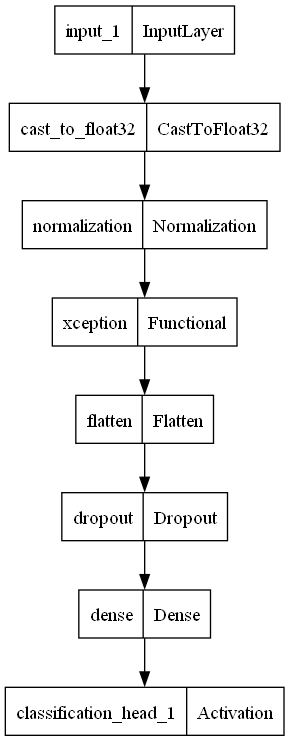

In [188]:
# 각 층의 출력 형태와 이름을 다이어그램에 표시합니다.
plot_model(model)

**목적:**

- 모델의 구조를 한눈에 확인하여 설계가 올바른지 검토합니다.
- 각 층의 연결 관계와 데이터 흐름을 시각적으로 이해합니다.
- 모델을 설명하거나 문서화할 때 유용하게 사용할 수 있습니다.

## 모델 튜닝

### CNN 모델 평가

In [28]:
# 테스트 데이터에 대한 전처리된 이미지 배열(X)을 생성합니다.
x_test = np.array([img_preprocess(p) for p in aic.test_df.name.values])

# 테스트 데이터에 대한 레이블(y)을 생성합니다.
y_test = aic.test_df.outcome.values

**설명:**

- x_test = np.array([img_preprocess(p) for p in aic.test_df.name.values]):
    - aic.test_df.name.values는 테스트 데이터프레임의 'name' 열에서 이미지 파일 경로 목록을 가져옵니다.
    - 리스트 내포를 사용하여 각 이미지 파일 경로에 대해 img_preprocess(p) 함수를 호출하여 이미지를 전처리합니다.
    - 전처리된 이미지를 NumPy 배열로 변환하여 x_test에 저장합니다.
      

     
      
- y_test = aic.test_df.outcome.values:
    - aic.test_df.outcome.values는 테스트 데이터프레임의 'outcome' 열에서 레이블 목록을 가져옵니다.
    - 이 레이블 목록을 y_test에 저장합니다.

**목적:**

테스트 데이터에 대한 전처리된 이미지 배열과 해당 레이블을 생성하여 모델 평가에 사용합니다.

In [29]:
# 테스트 데이터에 대한 예측 수행
y_pred_ori = model.predict(x_test)

# 예측된 결과를 반올림하여 이진 분류 값으로 변환
y_pred = [round(y[0], 0) for y in y_pred_ori]

# 정확도(Accuracy) 계산 및 출력
print("accuracy = ", accuracy_score(y_test, y_pred))

# 재현율(Recall) 계산 및 출력
print("recall = ", recall_score(y_test, y_pred))

# 정밀도(Precision) 계산 및 출력
print("precision = ", precision_score(y_test, y_pred))

# F1 점수(F1 Score) 계산 및 출력
print("f1 score = ", f1_score(y_test, y_pred))

10/10 [==============================] - 9s 746ms/step
accuracy =  1.0
recall =  1.0
precision =  1.0
f1 score =  1.0


**설명:**

1. y_pred_ori = model.predict(x_test):

- 모델이 테스트 데이터(x_test)에 대해 예측을 수행합니다.
- y_pred_ori는 모델의 예측 확률 값을 포함하는 배열입니다.
  
2. y_pred = [round(y[0], 0) for y in y_pred_ori]:

- 예측된 확률 값을 반올림하여 이진 분류 값(0 또는 1)으로 변환합니다.
- 리스트 내포를 사용하여 각 예측 값을 반올림합니다.

3. accuracy_score(y_test, y_pred):
- 정확도(Accuracy)를 계산합니다.
- 정확도는 전체 샘플 중 올바르게 분류된 샘플의 비율입니다.
  
4. recall_score(y_test, y_pred):
- 재현율(Recall)을 계산합니다.
- 재현율은 실제 양성 샘플 중 올바르게 예측된 양성 샘플의 비율입니다.
  
5. precision_score(y_test, y_pred):
- 정밀도(Precision)를 계산합니다.
- 정밀도는 예측된 양성 샘플 중 실제 양성 샘플의 비율입니다.
  
6. f1_score(y_test, y_pred):
- F1 점수를 계산합니다.
- F1 점수는 정밀도와 재현율의 조화 평균입니다.

**목적:**

모델의 성능을 다양한 평가 지표(정확도, 재현율, 정밀도, F1 점수)를 사용하여 평가합니다.

(array([ 15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 276.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

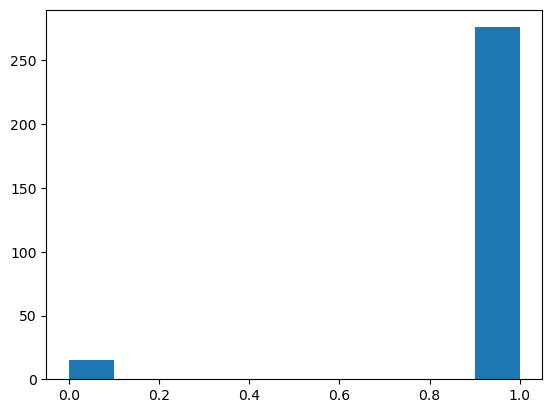

In [30]:
# 예측된 확률 값의 히스토그램을 그
plt.hist(y_pred_ori)

In [31]:
# 모델의 예측 결과를 출력합니다.
print('AutoKeras Model Predict : ', y_pred)

# 실제 값(y_test)과 예측 값(y_pred) 간의 평균 제곱근 오차(RMSE)를 계산합니다.
rmse = sqrt(mean_squared_error(y_test, y_pred))

# 계산된 RMSE 값을 출력합니다.
print('AutoKeras Model RMS : ', rmse)

AutoKeras Model Predict :  [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [32]:
# 혼동 행렬(confusion matrix)을 계산합니다.
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])

# 계산된 혼동 행렬을 출력합니다.
print(conf_matrix)

[[276   0]
 [  0  15]]


In [33]:
# ROC 곡선을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# FPR, TPR, 임계값들을 출력합니다.
print(fpr, tpr, thresholds)

[0. 0. 1.] [0. 1. 1.] [2. 1. 0.]


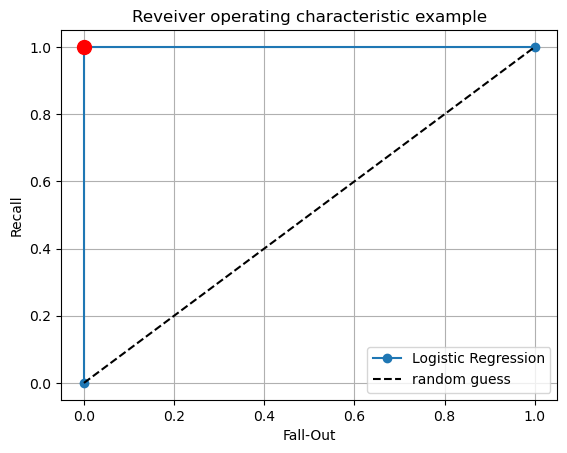

In [34]:
# 혼동 행렬에서 재현율(Recall)과 거짓 양성율(Fall-Out)을 계산합니다.
recall = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
fallout = conf_matrix[1][0] / (conf_matrix[1][0] + conf_matrix[1][1])

# ROC 곡선을 플로팅합니다.
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver Operating Characteristic Example')
plt.grid()
plt.legend()
plt.show()

**설명:**

- recall = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1]): 혼동 행렬을 사용하여 재현율(Recall)을 계산합니다.
- fallout = conf_matrix[1][0] / (conf_matrix[1][0] + conf_matrix[1][1]): 혼동 행렬을 사용하여 거짓 양성율(Fall-Out)을 계산합니다.
- plt.plot(fpr, tpr, 'o-', label="Logistic Regression"): ROC 곡선을 플로팅합니다.
- plt.plot([0, 1], [0, 1], 'k--', label="random guess"): 랜덤 추측의 기준선을 플로팅합니다.
- plt.plot([fallout], [recall], 'ro', ms=10): Fall-Out과 Recall 값을 점으로 표시합니다.
- plt.xlabel('Fall-Out'): x축 라벨을 설정합니다.
- plt.ylabel('Recall'): y축 라벨을 설정합니다.
- plt.title('Receiver Operating Characteristic Example'): 그래프 제목을 설정합니다.
- plt.grid(): 그리드를 표시합니다.
- plt.legend(): 범례를 표시합니다.
- plt.show(): 그래프를 화면에 표시합니다.

**목적:**

- ROC 곡선을 통해 모델의 분류 성능을 평가하고, 혼동 행렬을 사용하여 Fall-Out과 Recall 값을 시각적으로 확인합니다.

In [35]:
# 분류 보고서를 출력합니다.
print(classification_report(y_test, y_pred, target_names = ['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        15
     class 1       1.00      1.00      1.00       276

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



모델의 성능을 평가하기 위해 정확도, 정밀도, 재현율, F1 점수를 포함한 상세한 분류 보고서를 출력합니다.

# 분석 단계별 프로세스 - Decision Tree 알고리즘

## 데이터 불러오기

In [207]:
# 디렉토리에 있는 모든 파일 리스트 출력

# root_dir = os.getcwd()
# 한글 인식이 되지 않아 경로를 수동으로 지정
root_dir = 'C:/Users/Allen/Desktop/Project/KAMP/data'
f_lists = os.listdir(root_dir)
print("File Lists : ", f_lists)

File Lists :  ['Dataset_품질 이상탐지 진단(크로메이트) AI 데이터셋.zip', 'Error Lot list.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kem

In [39]:
# 디렉토리에 있는 모든 파일 리스트 중에서 .csv로 끝나는 파일 모두 가져오기
new_file_lists = [f for f in f_lists if f.endswith('.csv')]
print("Flie Lists :", new_file_lists)

Flie Lists : ['Error Lot list.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-se

In [40]:
# new_file_lists에서 첫 번째 항목을 제외한 나머지를 data_lists에 저장합니다.
data_lists = new_file_lists[1:]

# new_file_lists의 첫 번째 항목을 error_lists에 저장합니다.
error_lists = new_file_lists[0]

# data_lists와 error_lists를 출력합니다.
print("Data Lists : ", data_lists)
print("Error Data List : ", error_lists)

Data Lists :  ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.21.csv',

In [44]:
def csv_read_(data_dir, data_list):
    # 원코드에서 encoding = cp949 가 에러가 나서 utf-8로 변경.
    tmp = pd.read_csv(os.path.join(data_dir, data_list), sep=',', encoding='utf-8')
    
    # 파일 이름에서 연도, 월, 일을 추출
    y, m, d = map(int, data_list.split('-')[-1].split('.')[:-1])
    
    # 'Time' 열의 시간을 추출
    time = tmp['Time']
    
    # 'DTime' 열에 파일 이름에서 추출한 날짜를 추가
    tmp['DTime'] = '-'.join(data_list.split('-')[-1].split('.')[:-1])
    
    # 시간 문자열의 '오후'와 '오전'을 'PM'과 'AM'으로 변경하고, 끝의 두 자리 제거
    ctime = time.apply(lambda _: _.replace(u'오후', 'PM').replace(u'오전', 'AM')[:-2])
    
    # 문자열을 datetime 형식으로 변환
    n_time = ctime.apply(lambda _: datetime.datetime.strptime(_, "%p %I:%M:%S"))
    
    # datetime 객체에 연도, 월, 일을 추가
    newtime = n_time.apply(lambda _: _.replace(year=y, month=m, day=d))
    
    # 변환된 시간을 'Time' 열에 저장
    tmp['Time'] = newtime 
    return tmp

In [45]:
# 첫 번째 CSV 파일을 읽어서 데이터프레임으로 저장합니다.
dd = csv_read_(root_dir, data_lists[0])

# 나머지 CSV 파일들을 차례로 읽어서 첫 번째 데이터프레임과 병합합니다.
for i in range(1, len(data_lists)):
    dd = pd.merge(dd, csv_read_(root_dir, data_lists[i]), how='outer')

# 병합된 데이터프레임을 출력합니다.
dd

,Index,Lot,Time,pH,Temp,Voltage,DTime
0,1,1,2021-09-06 16:29:54,2.15,43.15,19.74,2021-09-06
1,2,1,2021-09-06 16:29:59,2.08,40.13,18.01,2021-09-06
2,3,1,2021-09-06 16:30:04,2.18,43.46,18.73,2021-09-06
3,4,1,2021-09-06 16:30:09,1.99,41.72,16.75,2021-09-06
4,5,1,2021-09-06 16:30:14,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...,...,...
50089,1514,22,2021-10-27 18:36:03,2.05,42.84,15.38,2021-10-27
50090,1515,22,2021-10-27 18:36:08,1.91,42.64,19.08,2021-10-27
50091,1516,22,2021-10-27 18:36:13,2.11,44.09,18.14,2021-10-27
50092,1517,22,2021-10-27 18:36:18,1.92,43.95,17.96,2021-10-27


In [46]:
# 필요없는 Index 컬럼 삭제
dd = dd.drop('Index', axis = 1)
dd

,Lot,Time,pH,Temp,Voltage,DTime
0,1,2021-09-06 16:29:54,2.15,43.15,19.74,2021-09-06
1,1,2021-09-06 16:29:59,2.08,40.13,18.01,2021-09-06
2,1,2021-09-06 16:30:04,2.18,43.46,18.73,2021-09-06
3,1,2021-09-06 16:30:09,1.99,41.72,16.75,2021-09-06
4,1,2021-09-06 16:30:14,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...,...
50089,22,2021-10-27 18:36:03,2.05,42.84,15.38,2021-10-27
50090,22,2021-10-27 18:36:08,1.91,42.64,19.08,2021-10-27
50091,22,2021-10-27 18:36:13,2.11,44.09,18.14,2021-10-27
50092,22,2021-10-27 18:36:18,1.92,43.95,17.96,2021-10-27


In [47]:
# 인덱스를 Time으로 설정
dd = dd.set_index('Time')
dd

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13,22,2.11,44.09,18.14,2021-10-27


## 데이터 탐색

In [49]:
# 데이터 사본 생성
dedicated_data = dd.copy()
dedicated_data

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13,22,2.11,44.09,18.14,2021-10-27


In [50]:
# 데이터 컬럼 확인
dedicated_data.columns

Index(['Lot', 'pH', 'Temp', 'Voltage', 'DTime'], dtype='object')

In [51]:
dedicated_data.describe()

,Lot,pH,Temp,Voltage
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,2.008331,42.454195,17.452394
std,6.344352,0.123021,1.471800,1.458218
min,1.000000,1.810000,33.140000,10.230000
25%,6.000000,1.910000,41.300000,16.300000
50%,11.500000,2.010000,42.480000,17.480000
75%,17.000000,2.100000,43.650000,18.640000
max,22.000000,2.490000,44.990000,19.990000


In [52]:
dedicated_data.shape

(50094, 5)

In [53]:
dedicated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50094 entries, 2021-09-06 16:29:54 to 2021-10-27 18:36:23
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lot      50094 non-null  int64  
 1   pH       50094 non-null  float64
 2   Temp     50094 non-null  float64
 3   Voltage  50094 non-null  float64
 4   DTime    50094 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.3+ MB


In [54]:
dedicated_data.isnull().sum()

Lot        0
pH         0
Temp       0
Voltage    0
DTime      0
dtype: int64

array([[<Axes: title={'center': 'Lot'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Voltage'}>]], dtype=object)

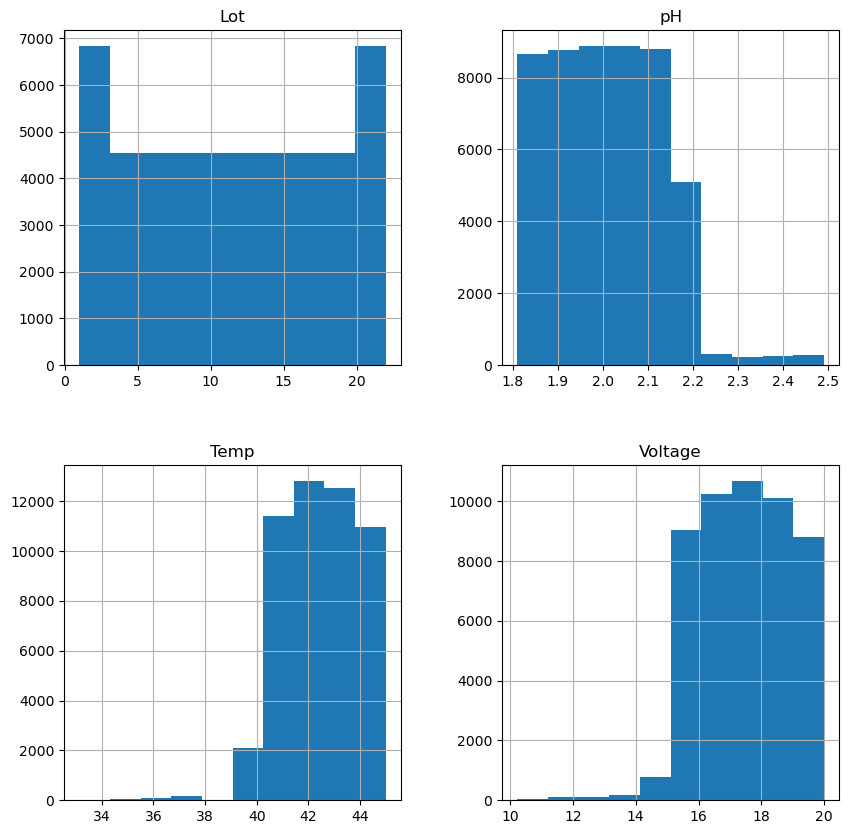

In [55]:
# 데이터 히스토그램 확인
dedicated_data.hist(figsize = (10,10))

In [56]:
correlation = dedicated_data[['Lot','pH','Temp','Voltage']].corr()
correlation

,Lot,pH,Temp,Voltage
Lot,1.000000,-0.011503,0.005429,0.001803
pH,-0.011503,1.000000,-0.032165,-0.030503
Temp,0.005429,-0.032165,1.000000,0.022263
Voltage,0.001803,-0.030503,0.022263,1.000000


<Axes: >

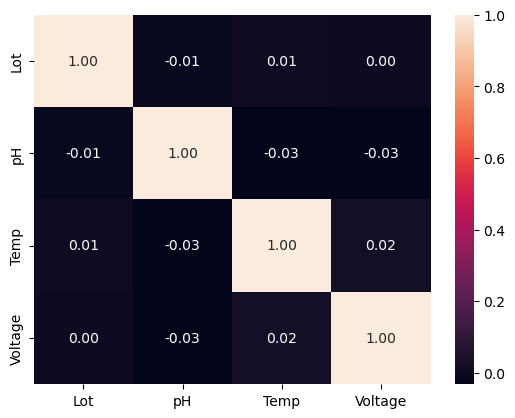

In [57]:
sns.heatmap(correlation, annot=True, fmt='.2f')

## 데이터 전처리

In [59]:
# Null 값 제
dedicated_data = dedicated_data.dropna()
dedicated_data

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13,22,2.11,44.09,18.14,2021-10-27


## 학습, 평가 데이터 준비

In [61]:
lot_lists = dedicated_data['Lot'].unique()
print(lot_lists)
print(len(lot_lists))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
22


In [62]:
d_lists = dedicated_data['DTime'].unique()
print(d_lists)
print(len(d_lists))

['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']
33


In [64]:
error = pd.read_csv(os.path.join(root_dir,error_lists),sep = ',', encoding='UTF8')
error

,0,1,2
0,2021-09-06,NaN,NaN
1,2021-09-07,NaN,NaN
2,2021-09-08,20.0,NaN
3,2021-09-09,16.0,5.0
4,2021-09-10,NaN,NaN
5,2021-09-13,NaN,NaN
6,2021-09-14,NaN,NaN
7,2021-09-15,NaN,NaN
8,2021-09-16,4.0,NaN
9,2021-09-17,NaN,NaN


In [65]:
# 결측치가 있는 행을 삭제합니다. 각 행에서 최소 두 개 이상의 비결측치가 있어야 행이 유지됩니다.
error_drop = error.dropna(thresh=2)

# 결측치가 처리된 데이터프레임을 출력합니다.
error_drop

,0,1,2
2,2021-09-08,20.0,NaN
3,2021-09-09,16.0,5.0
8,2021-09-16,4.0,NaN
13,2021-09-28,16.0,NaN
16,2021-10-01,21.0,NaN
18,2021-10-06,6.0,NaN
29,2021-10-22,3.0,NaN
30,2021-10-25,16.0,NaN


In [66]:
error_drop['2'].unique().tolist()

[nan, 5.0]

In [67]:
# 빈 리스트를 생성합니다.
lot_error_lists = []

# '1' 열의 고유 값을 리스트로 변환하여 저장합니다.
lot_error_lists1 = error_drop['1'].unique().tolist()

# '2' 열의 고유 값에서 NaN이 아닌 값을 리스트로 변환하여 저장합니다.
lot_error_lists2 = error_drop['2'].unique()[~np.isnan(error_drop['2'].unique())].tolist()

# 두 리스트를 결합합니다.
lot_error_lists = lot_error_lists1 + lot_error_lists2

# 리스트의 모든 값을 정수로 변환합니다.
lot_error_lists = list(map(int, lot_error_lists))

# '0' 열의 고유 값을 저장합니다.
d_error_lists = error_drop['0'].unique()

# 고유한 LoT 리스트를 출력합니다.
print("Unique LoT List  :", lot_error_lists)

# 고유한 날짜 리스트를 출력합니다.
print("Unique Date List  :", d_error_lists)

Unique LoT List  : [20, 16, 4, 21, 6, 3, 5]
Unique Date List  : ['2021-09-08' '2021-09-09' '2021-09-16' '2021-09-28' '2021-10-01'
 '2021-10-06' '2021-10-22' '2021-10-25']


In [68]:
X_data = pd.DataFrame(columns = ['pH','Temp','Voltage','QC'])

In [69]:
# 두 개의 데이터프레임에서 필요한 부분만 합침.
for d in d_lists:
    for lot in lot_lists:
        # 특정 날짜와 Lot 번호에 해당하는 데이터를 필터링합니다.
        tmp = dd[(dd['DTime'] == d) & (dd['Lot'] == lot)]
        tmp = tmp[['pH', 'Temp', 'Voltage']]  # 필요한 열만 선택합니다.
        
        # 특정 날짜와 Lot 번호에 해당하는 오류 데이터를 필터링합니다.
        error_df = error_drop[(error_drop['0'] == d) & ((error_drop['1'] == lot) | (error_drop['2'] == lot))]
        len_error = len(error_df)
        
        # 오류 데이터가 있으면 QC 값을 0으로, 없으면 1로 설정합니다.
        if len_error > 0:
            trr = np.full((tmp['pH'].shape), 0)
        else:
            trr = np.full((tmp['pH'].shape), 1)
        
        tmp['QC'] = trr
        
        # 데이터 프레임의 .append()함수는 deprecated 되어서 concat으로 대체.
        # 기존 코드 : X_data = X_data.append(tmp)
        X_data = pd.concat([X_data, tmp], ignore_index = False) # ignore_index = False로 하여 기존 인덱스 유지
# 데이터 프레임의 모든 열을 숫자형으로 변환합니다.
X_data = X_data.apply(pd.to_numeric)

C:\Users\Allen\AppData\Local\Temp\ipykernel_28496\2279324014.py:15: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X_data = pd.concat([X_data, tmp], ignore_index = False) # ignore_index = False로 하여 기존 인덱스 유지
C:\Users\Allen\AppData\Local\Temp\ipykernel_28496\2279324014.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_data = pd.concat([X_data, tmp], ignore_index = False) # ignore_index = False로 하여 기존 인덱스 유지


In [70]:
X_data

,pH,Temp,Voltage,QC
2021-09-06 16:29:54,2.15,43.15,19.74,1
2021-09-06 16:29:59,2.08,40.13,18.01,1
2021-09-06 16:30:04,2.18,43.46,18.73,1
2021-09-06 16:30:09,1.99,41.72,16.75,1
2021-09-06 16:30:14,1.85,43.65,18.02,1
...,...,...,...,...
2021-10-27 18:36:03,2.05,42.84,15.38,1
2021-10-27 18:36:08,1.91,42.64,19.08,1
2021-10-27 18:36:13,2.11,44.09,18.14,1
2021-10-27 18:36:18,1.92,43.95,17.96,1


In [71]:
X_data.describe()

,pH,Temp,Voltage,QC
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,2.008331,42.454195,17.452394,0.987603
std,0.123021,1.471800,1.458218,0.110649
min,1.810000,33.140000,10.230000,0.000000
25%,1.910000,41.300000,16.300000,1.000000
50%,2.010000,42.480000,17.480000,1.000000
75%,2.100000,43.650000,18.640000,1.000000
max,2.490000,44.990000,19.990000,1.000000


In [72]:
X_data.corr()

,pH,Temp,Voltage,QC
pH,1.000000,-0.032165,-0.030503,-0.013707
Temp,-0.032165,1.000000,0.022263,0.007044
Voltage,-0.030503,0.022263,1.000000,0.012254
QC,-0.013707,0.007044,0.012254,1.000000


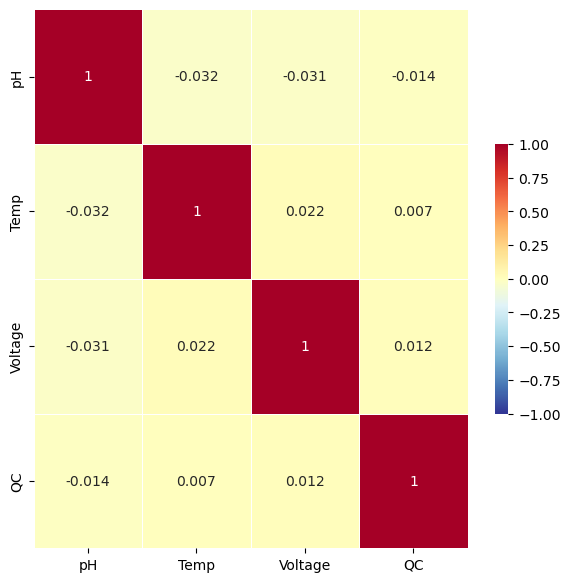

In [73]:
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(X_data.corr(), cmap='RdYlBu_r', annot = True, linewidths = 0.5, cbar_kws={"shrink":.5},
           vmin = -1, vmax = 1)
plt.show()

In [74]:
# 학습용, 테스트용 데이터 구분
train_data, test_data = train_test_split(X_data, test_size = 0.2)

In [75]:
train_data.describe()

,pH,Temp,Voltage,QC
count,40075.000000,40075.000000,40075.000000,40075.000000
mean,2.008225,42.451351,17.452437,0.987299
std,0.123178,1.474914,1.460658,0.111983
min,1.810000,33.210000,10.230000,0.000000
25%,1.910000,41.300000,16.300000,1.000000
50%,2.010000,42.480000,17.490000,1.000000
75%,2.100000,43.650000,18.640000,1.000000
max,2.490000,44.990000,19.990000,1.000000


In [76]:
train_data.corr()

,pH,Temp,Voltage,QC
pH,1.000000,-0.032998,-0.031668,-0.014876
Temp,-0.032998,1.000000,0.024766,0.005783
Voltage,-0.031668,0.024766,1.000000,0.010385
QC,-0.014876,0.005783,0.010385,1.000000


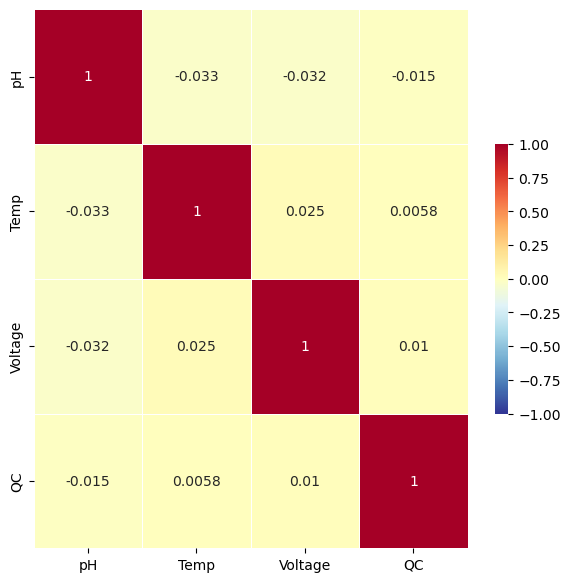

In [77]:
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(train_data.corr(), cmap='RdYlBu_r', annot = True, linewidths = 0.5, cbar_kws={"shrink":.5},
           vmin = -1, vmax = 1)
plt.show()

In [78]:
test_data.describe()

,pH,Temp,Voltage,QC
count,10019.000000,10019.000000,10019.000000,10019.000000
mean,2.008755,42.465569,17.452222,0.988821
std,0.122398,1.459294,1.448492,0.105142
min,1.810000,33.140000,10.440000,0.000000
25%,1.910000,41.305000,16.310000,1.000000
50%,2.010000,42.480000,17.460000,1.000000
75%,2.100000,43.670000,18.650000,1.000000
max,2.490000,44.990000,19.990000,1.000000


In [79]:
test_data.corr()

,pH,Temp,Voltage,QC
pH,1.000000,-0.028811,-0.025773,-0.008760
Temp,-0.028811,1.000000,0.012059,0.012370
Voltage,-0.025773,0.012059,1.000000,0.020304
QC,-0.008760,0.012370,0.020304,1.000000


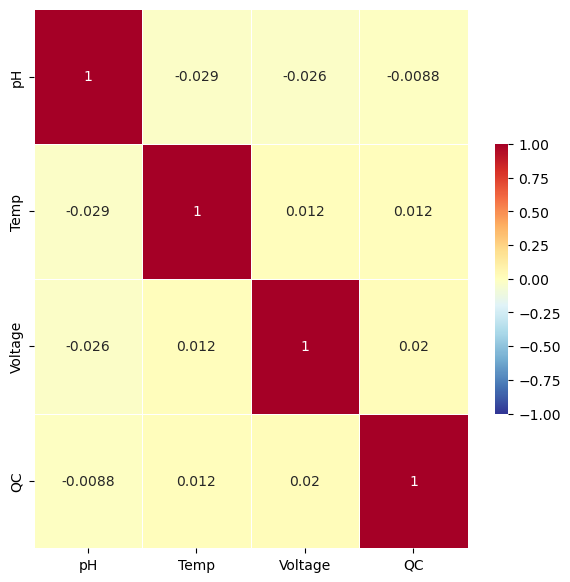

In [80]:
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(test_data.corr(), cmap='RdYlBu_r', annot = True, linewidths = 0.5, cbar_kws={"shrink":.5},
           vmin = -1, vmax = 1)
plt.show()

## 모델링

In [296]:
# 최대 깊이가 5인 결정 트리 회귀 모델을 생성합니다.
clf = tree.DecisionTreeRegressor(max_depth=5)

## 모델 훈련

In [298]:
# 결정 트리 회귀 모델을 학습합니다.
clf = clf.fit(X_data[['pH','Temp','Voltage']], X_data[['QC']])

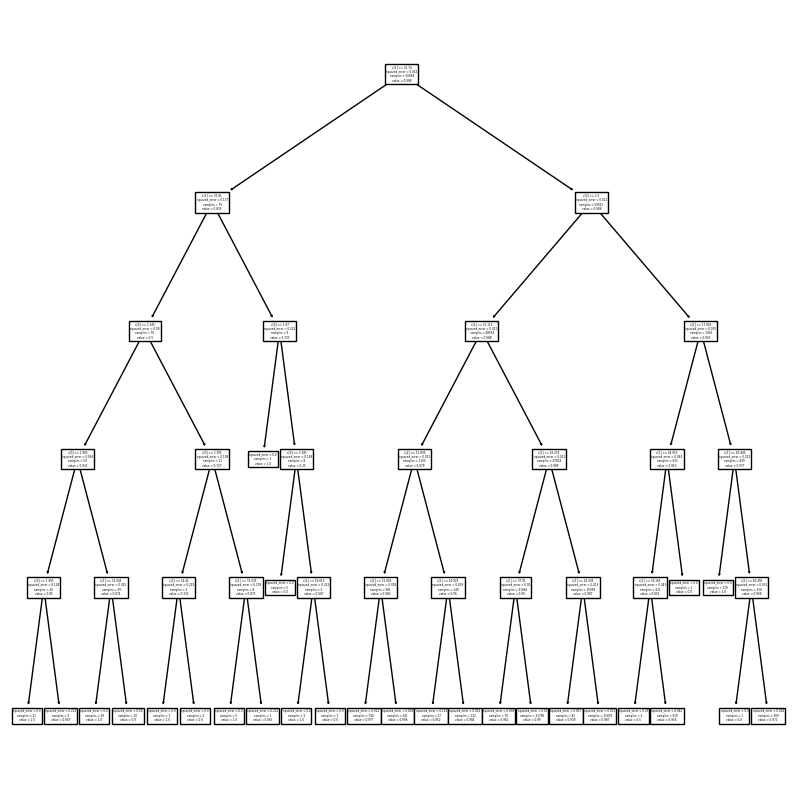

In [299]:
# 시각화를 수행할지 여부를 결정
vis = True

# 시각화가 활성화되었는지 확인합니다.
if vis:
    plt.figure(figsize=(10, 10))
    tree.plot_tree(clf)
    plt.show()

## 모델 튜닝

In [301]:
# 최대 깊이가 3인 새로운 결정 트리 회귀 모델을 생성합니다.
new_clf = tree.DecisionTreeRegressor(max_depth=3)

# 새로운 결정 트리 회귀 모델을 학습합니다.
new_clf = new_clf.fit(X_data[['pH', 'Temp', 'Voltage']], X_data[['QC']])

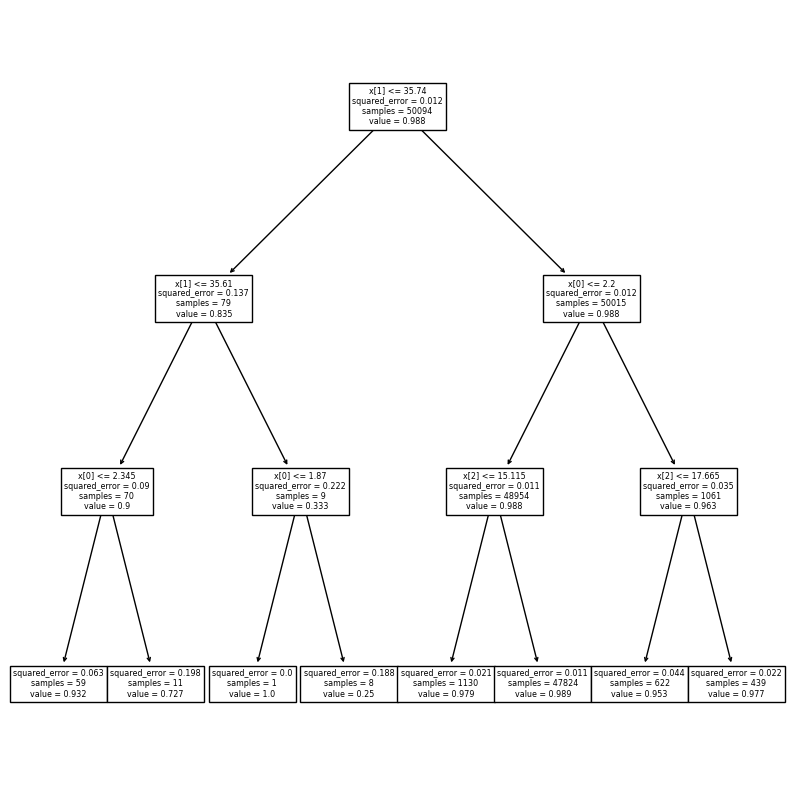

In [302]:
vis = True
if vis :
    plt.figure(figsize=(10,10))
    tree.plot_tree(new_clf)
    plt.show()

## 모델 평가 및 해석

In [304]:
# 테스트 데이터에 대한 예측을 수행합니다.
clf_predicted = clf.predict(test_data[['pH', 'Temp', 'Voltage']])

# 결정 트리 모델의 예측 결과를 출력합니다.
print("Decision Tree Model Predict : ", clf_predicted)

# 실제 값(QC)과 예측 값(clf_predicted) 간의 평균 제곱근 오차(RMSE)를 계산합니다.
rmse = sqrt(mean_squared_error(test_data['QC'], clf_predicted))

# 계산된 RMSE 값을 출력합니다.
print('Decision Tree Model RMSE : ', rmse)

Decision Tree Model Predict :  [0.98702444 0.99585062 0.98958792 ... 0.98702444 0.98958792 0.99585062]
Decision Tree Model RMSE :  0.10412466699683591


In [305]:
# 각각의 값 도출
y_test = test_data['QC']
y_pred = [round(y,0) for y in clf_predicted]
print('accuracy = ', accuracy_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred))

accuracy =  0.9889210500049905
recall =  0.9998990612698092
precision =  0.9890175718849841
f1 score =  0.9944285499171812


In [306]:
# 혼동행렬 계산
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)
print('TP : ', TP)
print('FP : ', FP)
print('FN : ', FN)
print('TN : ', TN)

TP :  2
FP :  110
FN :  1
TN :  9906


In [307]:
# TPR(True Positive Rate) 값을 계산합니다.
if (TP + FN) == 0:
    tpr_val = 0
else:
    tpr_val = TP / (TP + FN)

# FPR(False Positive Rate) 값을 계산합니다.
if (TN + FP) == 0:
    fpr_val = 0
else:
    fpr_val = TN / (TN + FP)

# 계산된 TPR과 FPR 값을 출력합니다.
print(tpr_val, fpr_val)

# ROC 곡선을 계산합니다.
tpr, fpr, _ = roc_curve(y_test, y_pred)

# 계산된 TPR과 FPR 값을 ROC 곡선에 반영합니다.
tpr[1] = tpr_val
fpr[1] = fpr_val

# TPR과 FPR 배열의 길이가 3보다 작으면 1을 추가합니다.
if len(tpr) < 3:
    tpr = np.append(tpr, 1)
    fpr = np.append(fpr, 1)

# 수정된 FPR과 TPR 값을 출력합니다.
print(fpr, tpr)

0.6666666666666666 0.9890175718849841
[0.         0.98901757 1.        ] [0.         0.66666667 1.        ]


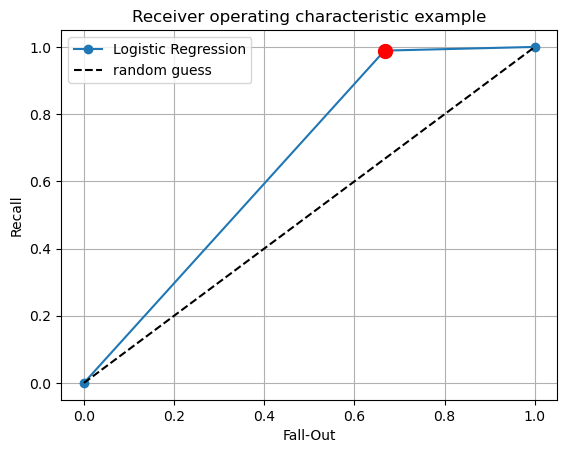

In [308]:
# roc curve 시각화
plt.plot(tpr, fpr, 'o-', label = 'Logistic Regression')
plt.plot([0,1],[0,1], 'k--', label = 'random guess')
plt.plot([tpr_val], [fpr_val], 'ro', ms = 10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.grid()
plt.legend()
plt.show()

In [244]:
# Decision Tree 모델 검토 값 요약
print(classification_report(y_test, y_pred, target_names = ['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.67      0.02      0.03       112
     class 1       0.99      1.00      0.99      9907

    accuracy                           0.99     10019
   macro avg       0.83      0.51      0.51     10019
weighted avg       0.99      0.99      0.98     10019



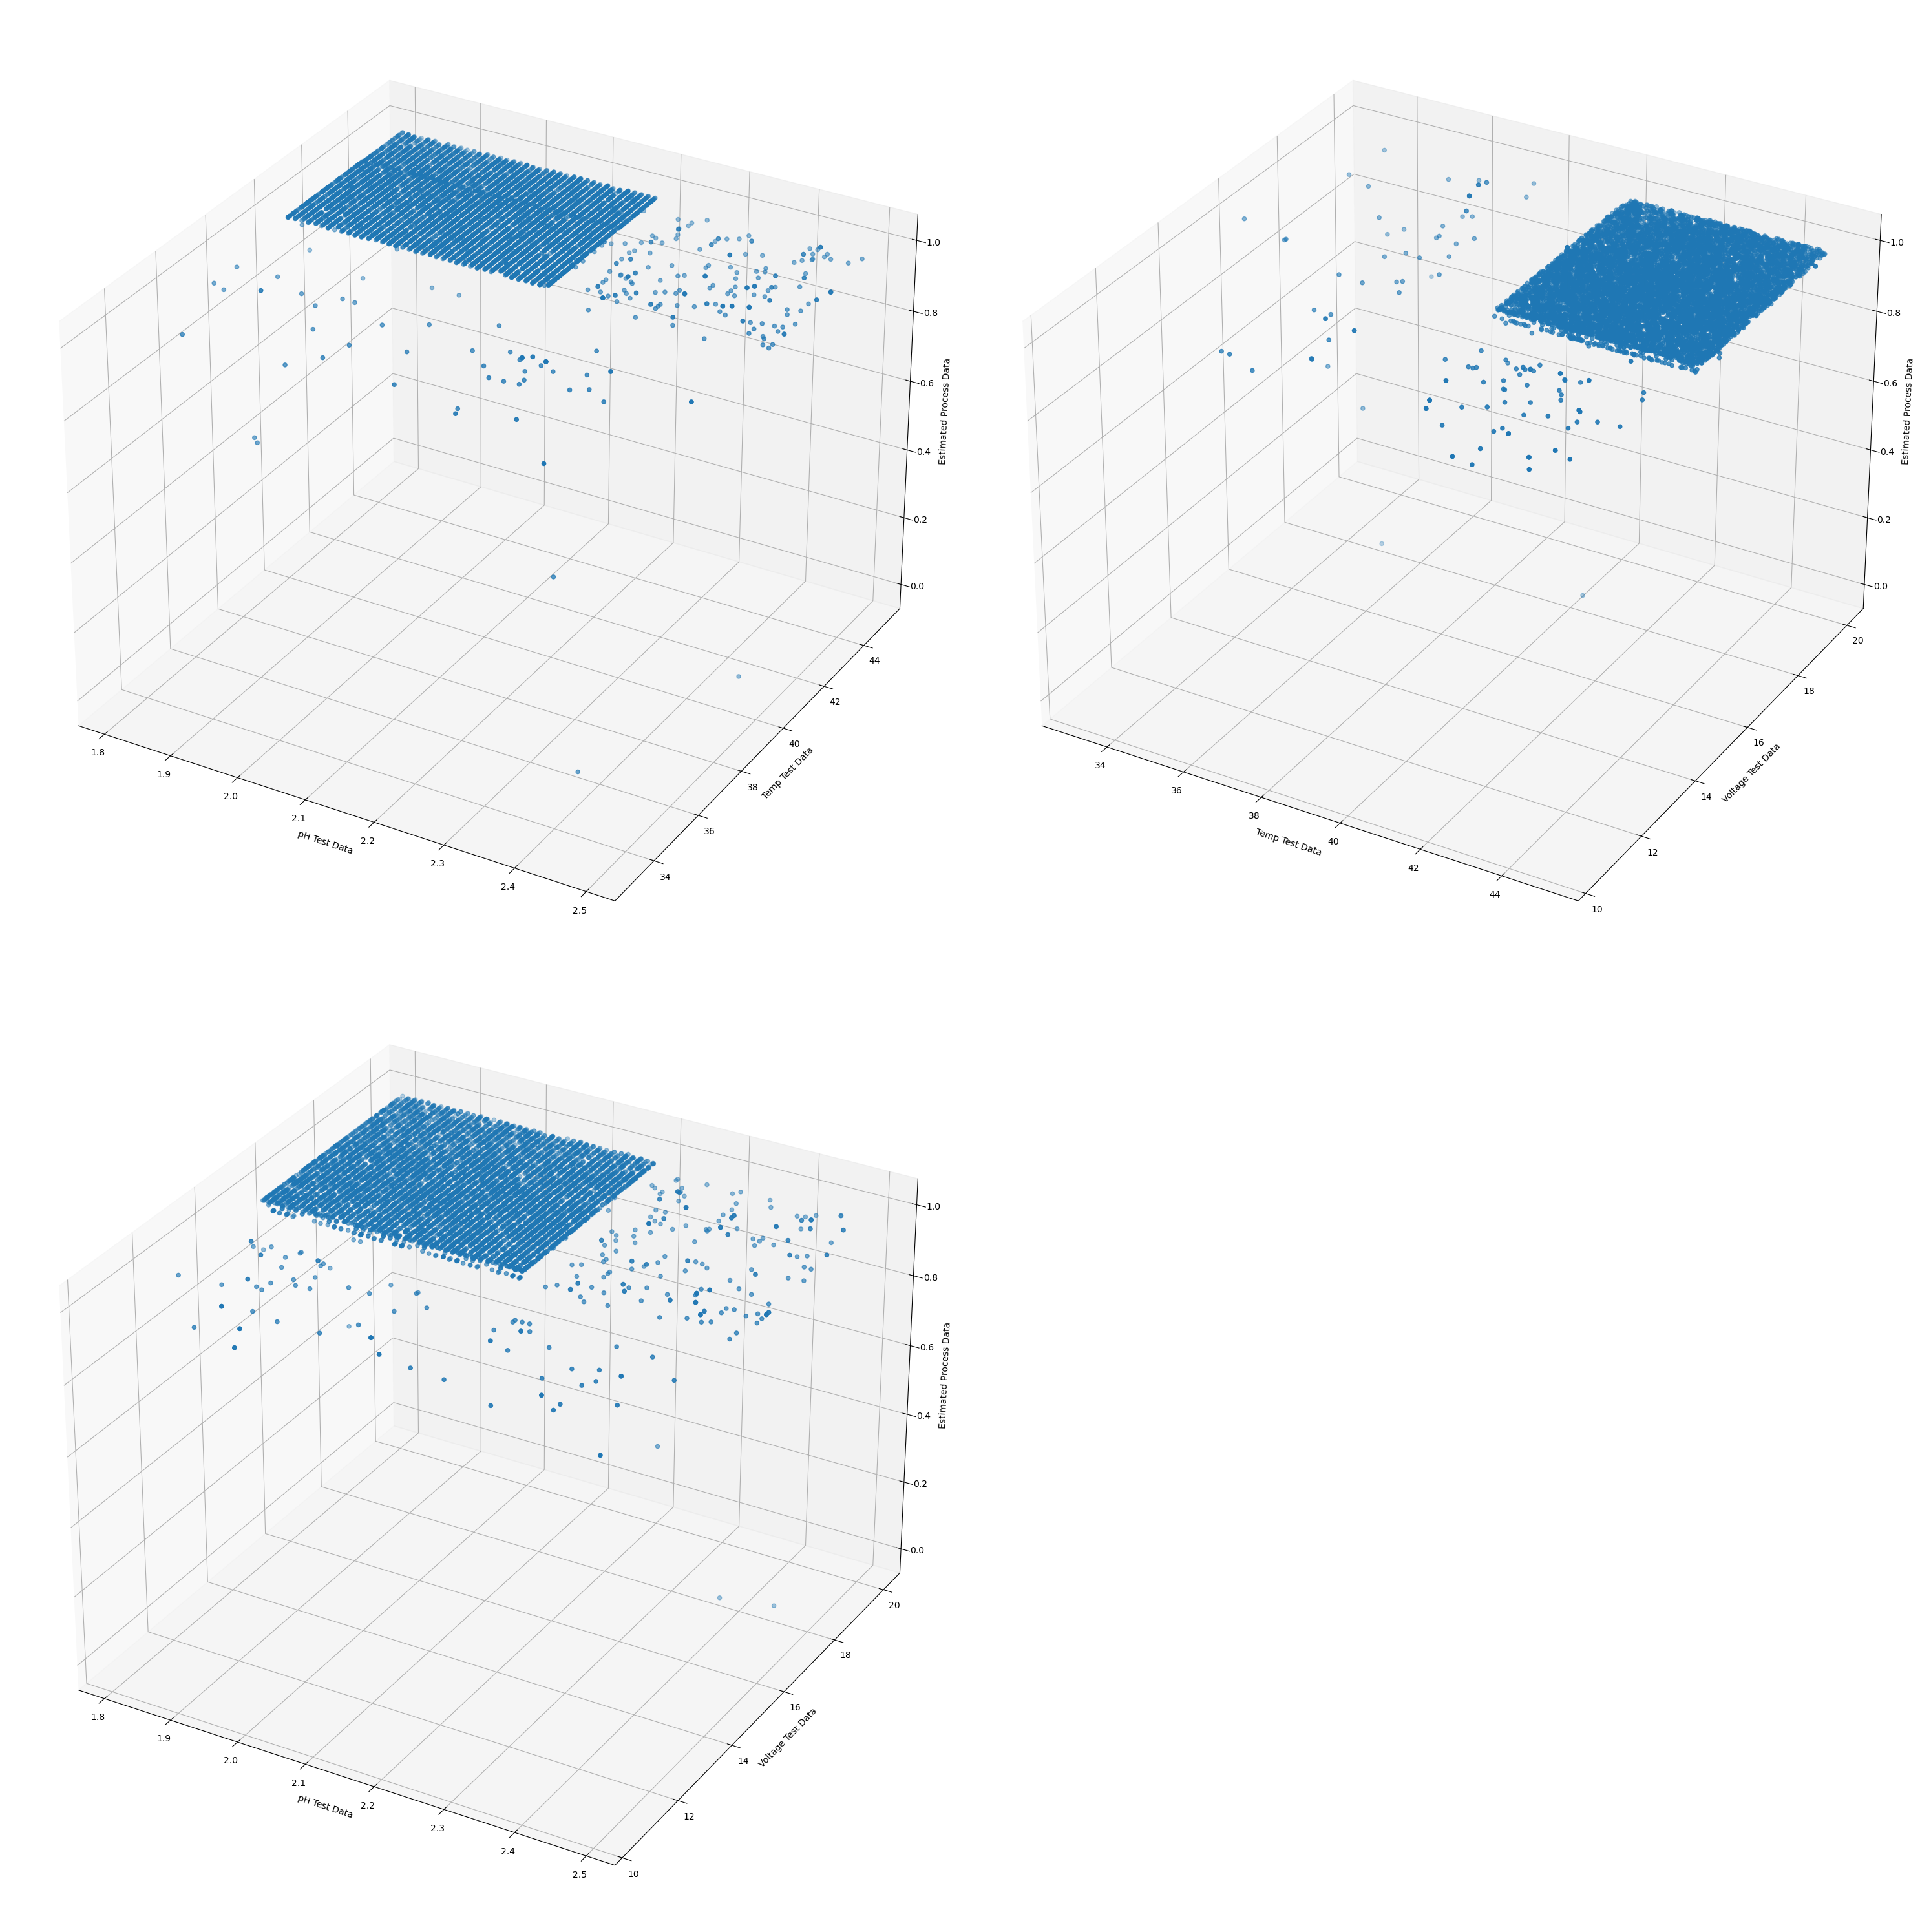

In [246]:
# 새로운 그림을 생성하고 크기를 30x30 인치로 설정합니다.
fig = plt.figure(figsize=(30, 30))

# 첫 번째 3D 서브플롯을 생성합니다.
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(test_data['pH'], test_data['Temp'], clf_predicted)
ax1.set_xlabel('pH Test Data')
ax1.set_ylabel('Temp Test Data')
ax1.set_zlabel('Estimated Process Data')

# 두 번째 3D 서브플롯을 생성합니다.
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(test_data['Temp'], test_data['Voltage'], clf_predicted)
ax2.set_xlabel('Temp Test Data')
ax2.set_ylabel('Voltage Test Data')
ax2.set_zlabel('Estimated Process Data')

# 세 번째 3D 서브플롯을 생성합니다.
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(test_data['pH'], test_data['Voltage'], clf_predicted)
ax3.set_xlabel('pH Test Data')
ax3.set_ylabel('Voltage Test Data')
ax3.set_zlabel('Estimated Process Data')

# 레이아웃을 조정하여 플롯들이 겹치지 않게 합니다.
plt.tight_layout()

# 그림을 화면에 표시합니다.
plt.show()

In [260]:
# 테스트 데이터에 대한 새로운 결정 트리 모델의 예측을 수행합니다.
nclf_predicted = new_clf.predict(test_data[['pH', 'Temp', 'Voltage']])

# 새로운 결정 트리 모델의 예측 결과를 출력합니다.
print('New Decision Tree Model Predict : ', nclf_predicted)

# 새로운 결정 트리 모델의 실제 값(QC)과 예측 값(nclf_predicted) 간의 평균 제곱근 오차(RMSE)를 계산합니다.
rmse = sqrt(mean_squared_error(test_data['QC'], nclf_predicted))

# 계산된 RMSE 값을 출력합니다.
print('New Decision Tree Model RMSE : ', rmse)

New Decision Tree Model Predict :  [0.98860405 0.97876106 0.98860405 ... 0.98860405 0.98860405 0.97876106]
New Decision Tree Model RMSE :  0.1050526941667405


In [250]:
y_test = test_data['QC']
y_pred = [round(y,0) for y in nclf_predicted]
print('accuracy = ', accuracy_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred))

accuracy =  0.9887214292843597
recall =  0.9998990612698092
precision =  0.9888201237772011
f1 score =  0.9943287327478043


In [99]:
TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)
print('TP : ', TP)
print('FP : ', FP)
print('FN : ', FN)
print('TN : ', TN)

TP :  0
FP :  112
FN :  1
TN :  9906


In [100]:
if (TP+FN) == 0:
    tpr_val = 0
else:
    tpr_val = TP / (TP+FN)
if (TN+FP) == 0:
    fpr_val = 0
else:
    fpr_val = TN / (TN+FP)
print(tpr_val, fpr_val)
tpr, fpr, _ = roc_curve(y_test, y_pred)
tpr[1] = tpr_val
fpr[1] = fpr_val
if len(tpr) < 3:
    tpr = np.append(tpr, 1)
    fpr = np.append(fpr, 1)
print(fpr, tpr)

0.0 0.9888201237772011
[0.         0.98882012 1.        ] [0. 0. 1.]


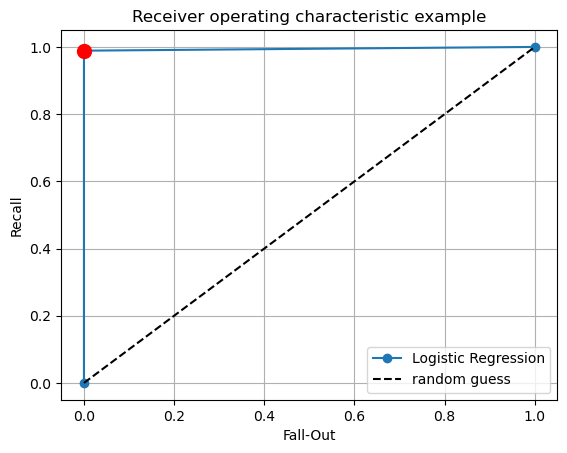

In [101]:
plt.plot(tpr, fpr, 'o-', label = 'Logistic Regression')
plt.plot([0,1],[0,1], 'k--', label = 'random guess')
plt.plot([tpr_val], [fpr_val], 'ro', ms = 10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.grid()
plt.legend()
plt.show()

In [102]:
print(classification_report(y_test, y_pred, target_names = ['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       112
     class 1       0.99      1.00      0.99      9907

    accuracy                           0.99     10019
   macro avg       0.49      0.50      0.50     10019
weighted avg       0.98      0.99      0.98     10019



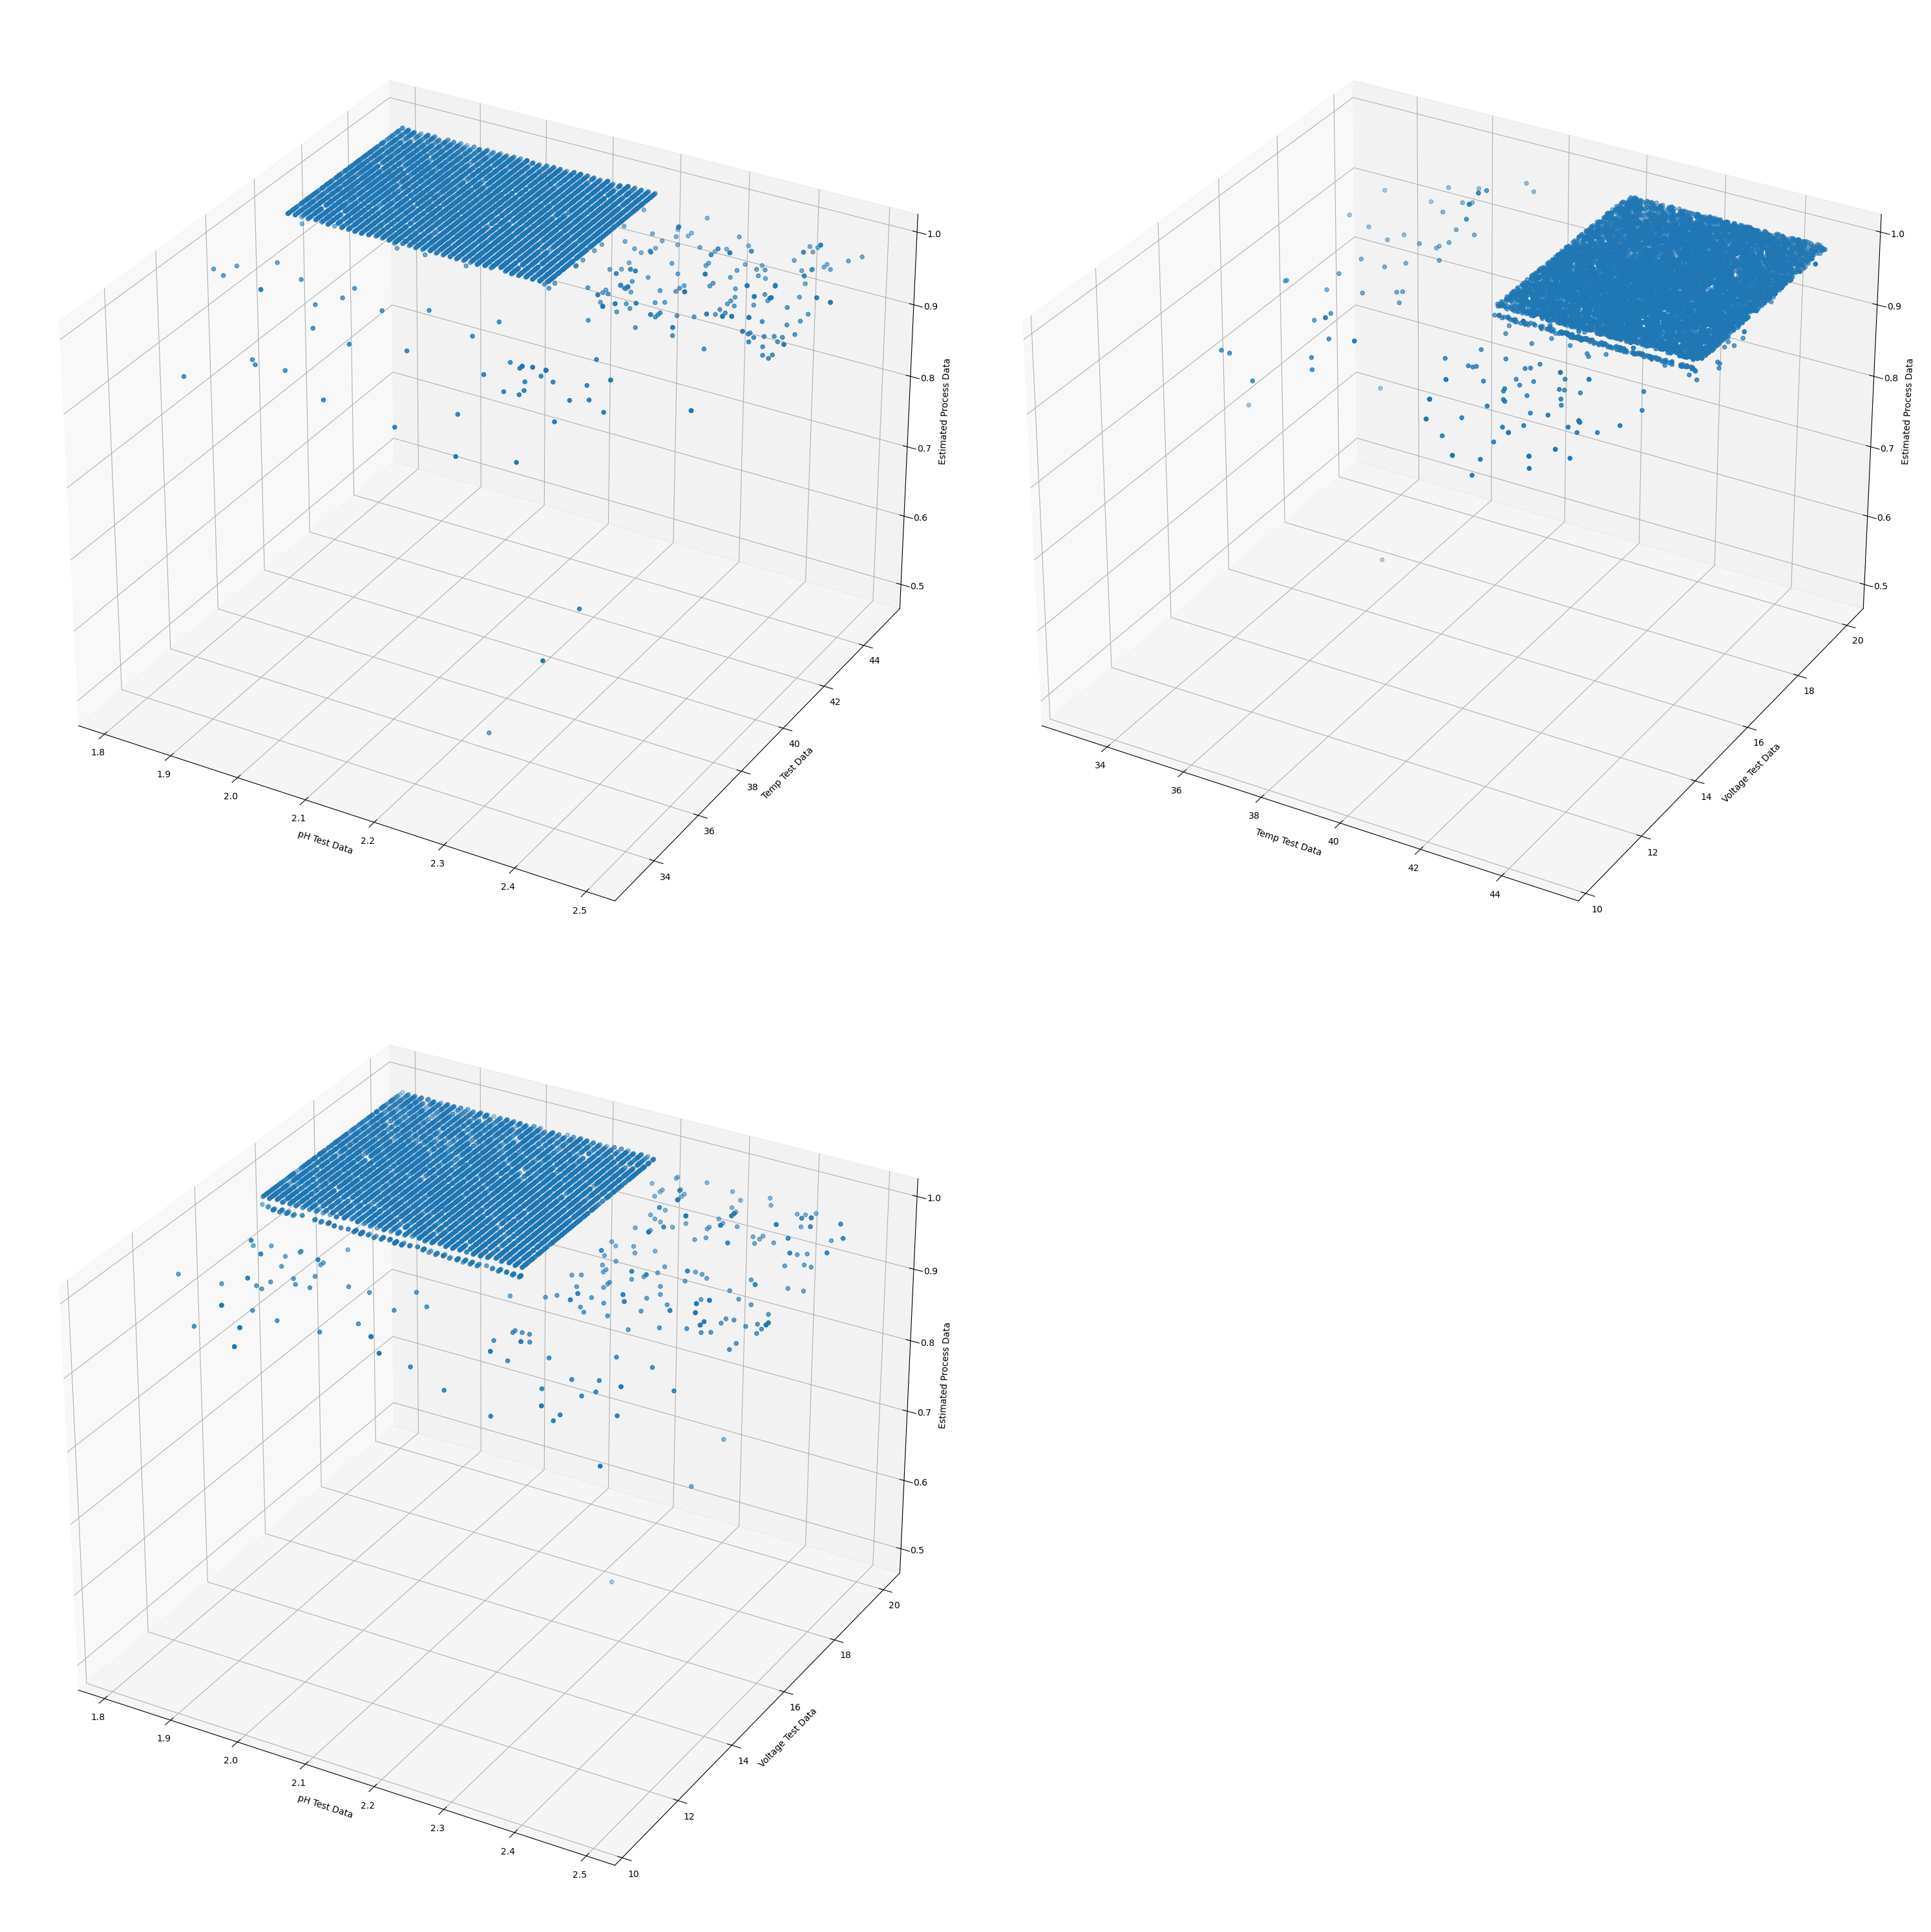

In [103]:
fig = plt.figure(figsize = (30,30))
ax1 = fig.add_subplot(2,2,1, projection = '3d')
ax1.scatter(test_data['pH'], test_data['Temp'], nclf_predicted)
ax1.set_xlabel('pH Test Data')
ax1.set_ylabel('Temp Test Data')
ax1.set_zlabel('Estimated Process Data')

ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.scatter(test_data['Temp'], test_data['Voltage'], nclf_predicted)
ax2.set_xlabel('Temp Test Data')
ax2.set_ylabel('Voltage Test Data')
ax2.set_zlabel('Estimated Process Data')

ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.scatter(test_data['pH'], test_data['Voltage'], nclf_predicted)
ax3.set_xlabel('pH Test Data')
ax3.set_ylabel('Voltage Test Data')
ax3.set_zlabel('Estimated Process Data')
plt.tight_layout()
plt.show()